#### Working with Time Series Using Pandas

In [3]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

###### Date Time Module

In [4]:
datetime.datetime(2000,1,1) # passing input (year,month,date ) and output will be (year,month,date,hour,min)

datetime.datetime(2000, 1, 1, 0, 0)

In [5]:
datetime.datetime.strptime("2000/12/1","%Y/%m/%d")  #used to create dates with different formats

datetime.datetime(2000, 12, 1, 0, 0)

In [6]:
datetime.datetime(2000, 12, 1, 0, 0).strftime("%Y/%m/%d") # another way to create date in different format

'2000/12/01'

In [7]:
datetime.datetime(2000, 12, 1, 0, 0).strftime("%Y.%m.%d") # another way to create date in different format

'2000.12.01'

###### Pandas for TIme Series

In [8]:
pd.to_datetime("01.09.2000")  #converted from String to TimeStamp format

Timestamp('2000-01-09 00:00:00')

In [9]:
pd.to_datetime("2000/12/01")

Timestamp('2000-12-01 00:00:00')

###### Pandas TimeStamp Object

In [10]:
ts=pd.to_datetime(94689000000000)

In [11]:
ts

Timestamp('1970-01-02 02:18:09')

In [12]:
ts.year,ts.month,ts.day,ts.weekday()

(1970, 1, 2, 4)

In [13]:
# to create time stamps on our own
#instead of timestamp() we can use pd.to_datetime

index=[pd.Timestamp("2000-01-01"),pd.Timestamp("2000-01-02"),pd.Timestamp("2000-01-03")]

ts=pd.Series(np.random.randn(len(index)),index=index)

In [14]:
ts

2000-01-01   -0.181568
2000-01-02    0.487595
2000-01-03   -0.354745
dtype: float64

In [15]:
ts.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03'], dtype='datetime64[ns]', freq=None)

In [16]:
ts=pd.Series(np.random.randn(len(index)),index=["2000-01-01","2000-01-02","2000-01-03"])

In [17]:
ts.index  #when we use TimeStamp function we got dtype as datetime and when we didn't used it we got dtype as object

Index(['2000-01-01', '2000-01-02', '2000-01-03'], dtype='object')

###### Generating Sequence of TimeStamp of fixed Interval

In [18]:
pd.date_range(start="1998-05-03",periods=3,freq='H') #period means how many dates we want to generate
#frequency means hourly,daily,weekly

DatetimeIndex(['1998-05-03 00:00:00', '1998-05-03 01:00:00',
               '1998-05-03 02:00:00'],
              dtype='datetime64[ns]', freq='H')

In [19]:
pd.date_range(start="1998-05-03",periods=3,freq='T') #minutes

DatetimeIndex(['1998-05-03 00:00:00', '1998-05-03 00:01:00',
               '1998-05-03 00:02:00'],
              dtype='datetime64[ns]', freq='T')

In [20]:
pd.date_range(start="1998-05-03",periods=3,freq='S') #seconds

DatetimeIndex(['1998-05-03 00:00:00', '1998-05-03 00:00:01',
               '1998-05-03 00:00:02'],
              dtype='datetime64[ns]', freq='S')

In [21]:
pd.date_range(start="1998-05-03",periods=3,freq='B') #B-Business Days(Monday-Fridays)

DatetimeIndex(['1998-05-04', '1998-05-05', '1998-05-06'], dtype='datetime64[ns]', freq='B')

In [22]:
pd.date_range(start="1998-05-03",periods=5,freq='1d1h1min10s') #Combinations of days,hours

DatetimeIndex(['1998-05-03 00:00:00', '1998-05-04 01:01:10',
               '1998-05-05 02:02:20', '1998-05-06 03:03:30',
               '1998-05-07 04:04:40'],
              dtype='datetime64[ns]', freq='90070S')

In [23]:
pd.date_range(start="1998-05-03",periods=5,freq='W-FRI')#where we have only Fridays

DatetimeIndex(['1998-05-08', '1998-05-15', '1998-05-22', '1998-05-29',
               '1998-06-05'],
              dtype='datetime64[ns]', freq='W-FRI')

In [24]:
pd.date_range(start="1998-05-03",periods=5,freq='WOM-2TUE')#Second Tuesday Monthly

DatetimeIndex(['1998-05-12', '1998-06-09', '1998-07-14', '1998-08-11',
               '1998-09-08'],
              dtype='datetime64[ns]', freq='WOM-2TUE')

In [25]:
s=pd.date_range(start="1998-05-03",periods=5,freq='BAS-JAN') # First Business Days Annually for January
t=pd.date_range(start="1998-05-03",periods=5,freq='A-FEB') # last Anualy days of Feburary
s.union(t)

DatetimeIndex(['1999-01-01', '1999-02-28', '2000-01-03', '2000-02-29',
               '2001-01-01', '2001-02-28', '2002-01-01', '2002-02-28',
               '2003-01-01', '2003-02-28'],
              dtype='datetime64[ns]', freq=None)

#### Simple plotting and Slicing dicing of Time Series

<AxesSubplot:>

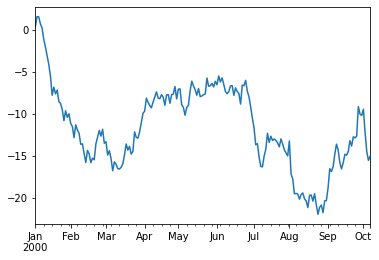

In [26]:
index=pd.date_range(start="2000-01-01",periods=200,freq='B')
ts=pd.Series(np.random.randn(len(index)),index=index)
walk=ts.cumsum()
walk.plot()

In [27]:
ts.head()

2000-01-03    0.374520
2000-01-04    1.226967
2000-01-05   -0.015580
2000-01-06   -0.830900
2000-01-07   -0.491722
Freq: B, dtype: float64

In [28]:
ts[0]

0.37452049437139934

In [29]:
ts['2000-01-04']

1.2269665501968754

In [30]:
ts[datetime.datetime(2000,1,3)]

0.37452049437139934

In [31]:
ts['2000-01-03':'2000-01-04']

2000-01-03    0.374520
2000-01-04    1.226967
Freq: B, dtype: float64

In [32]:
ts['2000-01-03':datetime.datetime(2000,1,3)]

2000-01-03    0.37452
Freq: B, dtype: float64

In [33]:
ts['2000-01':'2000-05']

2000-01-03    0.374520
2000-01-04    1.226967
2000-01-05   -0.015580
2000-01-06   -0.830900
2000-01-07   -0.491722
                ...   
2000-05-25   -0.971603
2000-05-26    0.036057
2000-05-29    0.306601
2000-05-30   -0.429874
2000-05-31    0.667285
Freq: B, Length: 108, dtype: float64

In [34]:
ts['2000-01']

2000-01-03    0.374520
2000-01-04    1.226967
2000-01-05   -0.015580
2000-01-06   -0.830900
2000-01-07   -0.491722
2000-01-10   -1.352779
2000-01-11   -0.928559
2000-01-12   -1.038916
2000-01-13   -1.047846
2000-01-14   -1.400093
2000-01-17   -2.276751
2000-01-18    0.961086
2000-01-19   -0.796540
2000-01-20    0.446360
2000-01-21   -1.383787
2000-01-24   -0.199330
2000-01-25   -0.732108
2000-01-26   -1.334910
2000-01-27    1.188446
2000-01-28   -0.784395
2000-01-31    0.416833
Freq: B, dtype: float64

In [35]:
small_ts=ts["2000-02-01":"2000-02-04"]
small_ts

2000-02-01   -1.133091
2000-02-02   -0.370776
2000-02-03   -1.335410
2000-02-04    1.517681
Freq: B, dtype: float64

In [36]:
#shift all the value by 2 units down

small_ts.shift(2)

2000-02-01         NaN
2000-02-02         NaN
2000-02-03   -1.133091
2000-02-04   -0.370776
Freq: B, dtype: float64

In [37]:
#shift all the value by 2 units down

small_ts.shift(-2)

2000-02-01   -1.335410
2000-02-02    1.517681
2000-02-03         NaN
2000-02-04         NaN
Freq: B, dtype: float64

#### Passenger Count Time Series

In [38]:
train=pd.read_csv("train_data.csv",date_parser=['Date'])

In [39]:
train.head()

,Date,count
0,2012-08-25,3
1,2012-08-26,3
2,2012-08-27,2
3,2012-08-28,2
4,2012-08-29,2


In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    578 non-null    object
 1   count   578 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 9.2+ KB


In [41]:
## Set the index to be datetime

train=train.set_index(pd.DatetimeIndex(train['Date']))

In [43]:
train.head()

,Date,count
Date,,
2012-08-25,2012-08-25,3
2012-08-26,2012-08-26,3
2012-08-27,2012-08-27,2
2012-08-28,2012-08-28,2
2012-08-29,2012-08-29,2


<AxesSubplot:xlabel='Date'>

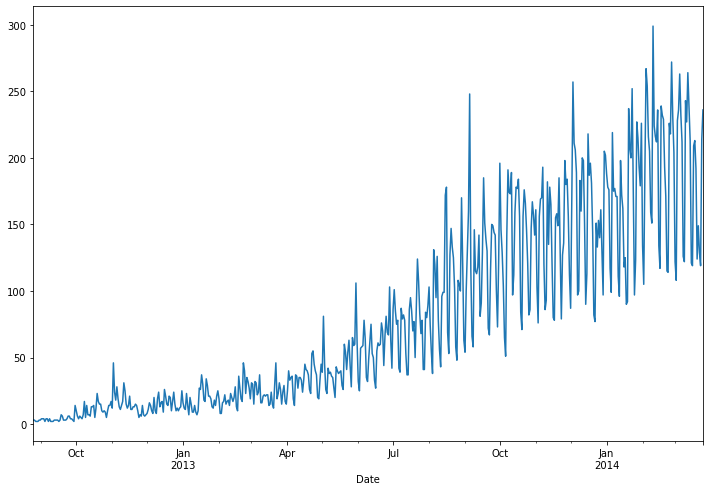

In [44]:
plt.figure(figsize=(12,8))
train['count'].plot()

#### Resampling

In [45]:
# We have data at daily level and we want to downsample it at weekly level

weekly_data=train.resample('w').mean()

In [46]:
print(weekly_data.shape)
weekly_data.head()

(84, 1)


,count
Date,
2012-08-26,3.000000
2012-09-02,2.857143
2012-09-09,3.142857
2012-09-16,2.571429
2012-09-23,4.142857


<AxesSubplot:xlabel='Date'>

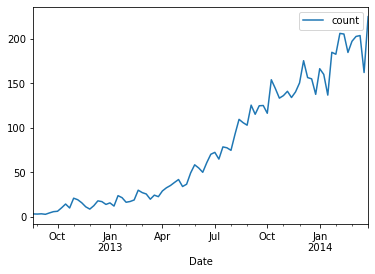

In [47]:
weekly_data.plot()

In [48]:
train.head(20)

,Date,count
Date,,
2012-08-25,2012-08-25,3
2012-08-26,2012-08-26,3
2012-08-27,2012-08-27,2
2012-08-28,2012-08-28,2
2012-08-29,2012-08-29,2
2012-08-30,2012-08-30,3
2012-08-31,2012-08-31,3
2012-09-01,2012-09-01,4
2012-09-02,2012-09-02,4


In [49]:
#upsampling---> daily to hourly

train.resample('H').ffill().head() #ffill is forward fill function

,Date,count
Date,,
2012-08-25 00:00:00,2012-08-25,3
2012-08-25 01:00:00,2012-08-25,3
2012-08-25 02:00:00,2012-08-25,3
2012-08-25 03:00:00,2012-08-25,3
2012-08-25 04:00:00,2012-08-25,3


In [52]:
# or we can use interpolate function instead of ffill

hourly_data=train.resample('H').interpolate().head(50)

<AxesSubplot:xlabel='Date'>

<Figure size 576x288 with 0 Axes>

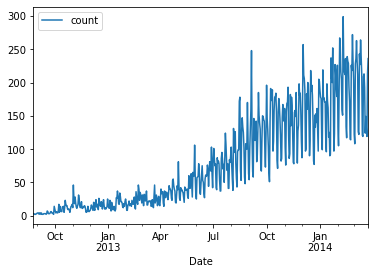

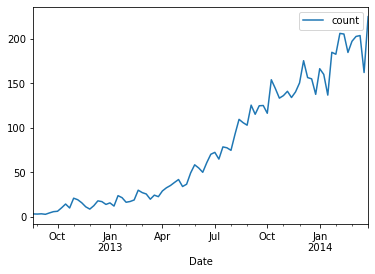

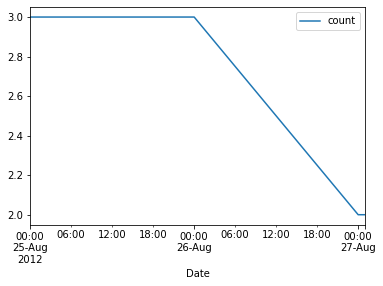

In [53]:
plt.figure(figsize=(8,4))

train.plot()
weekly_data.plot()
hourly_data.plot()

#### TimeZones

In [54]:
t=pd.Timestamp('2000-01-01')

In [55]:
t.tz is None

True

In [56]:
t=pd.Timestamp('2000-01-01',tz='Africa/Johannesburg')

In [57]:
t.tz

<DstTzInfo 'Africa/Johannesburg' SAST+2:00:00 STD>

In [58]:
rng=pd.date_range('1/1/2000',periods=10,freq='D',tz='Europe/London')

In [59]:
rng

DatetimeIndex(['2000-01-01 00:00:00+00:00', '2000-01-02 00:00:00+00:00',
               '2000-01-03 00:00:00+00:00', '2000-01-04 00:00:00+00:00',
               '2000-01-05 00:00:00+00:00', '2000-01-06 00:00:00+00:00',
               '2000-01-07 00:00:00+00:00', '2000-01-08 00:00:00+00:00',
               '2000-01-09 00:00:00+00:00', '2000-01-10 00:00:00+00:00'],
              dtype='datetime64[ns, Europe/London]', freq='D')

In [65]:
rng=pd.date_range('1/1/2000 00:00',periods=10,freq='D')
ts=pd.Series(np.random.randn(len(rng)),rng)
ts.index.tz is None

True

In [66]:
ts

2000-01-01   -0.226471
2000-01-02   -1.152292
2000-01-03    2.194156
2000-01-04    0.208295
2000-01-05   -1.051054
2000-01-06   -0.318056
2000-01-07   -0.591504
2000-01-08    1.643216
2000-01-09    0.011540
2000-01-10    0.462911
Freq: D, dtype: float64

In [67]:
ts_utc=ts.tz_localize('UTC')
ts_utc.index.tz

<UTC>

In [64]:
ts_utc

2000-01-01 00:00:00+00:00    1.007988
2000-01-02 00:00:00+00:00   -0.945770
2000-01-03 00:00:00+00:00    1.557340
2000-01-04 00:00:00+00:00    1.689010
2000-01-05 00:00:00+00:00    0.106110
2000-01-06 00:00:00+00:00   -1.604132
2000-01-07 00:00:00+00:00   -1.103911
2000-01-08 00:00:00+00:00   -1.464793
2000-01-09 00:00:00+00:00   -1.645075
2000-01-10 00:00:00+00:00   -0.728591
Freq: D, dtype: float64

In [68]:
#convert it from 1 timezone to another timezone

ts_utc.tz_convert('Europe/Berlin').index.tz

<DstTzInfo 'Europe/Berlin' LMT+0:53:00 STD>

In [69]:
#to detach from any time zone

ts_utc.tz_convert(None).index.tz is None

True

###### Time Delta 

In [70]:
#used to perform basic operation with time series

In [71]:
pd.Timedelta('1 Days')

Timedelta('1 days 00:00:00')

In [72]:
pd.Timedelta('-1 Days 2 min 10s 3us')

Timedelta('-2 days +23:57:49.999997')

In [73]:
pd.Timedelta('-1 Days')

Timedelta('-1 days +00:00:00')

In [74]:
pd.Timedelta(days=1,seconds=1)

Timedelta('1 days 00:00:01')

In [76]:
pd.Timedelta(days=1)+pd.Timedelta(seconds=60)

Timedelta('1 days 00:01:00')

In [77]:
pd.Timedelta('20.1s')

Timedelta('0 days 00:00:20.100000')